# MARKET EVALUATION

## Library_Import

In [43]:
    # Data manipulation
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as wb

    # Visualizations
import matplotlib as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

# Data_Import
* We retrieve all the required data for the analysis.

## PULL LISTS OF CFRA SECURITIES

In [44]:
import pandas as pd
import pandas_datareader as pdr

        
df=pd.read_excel(r'C:/Users/Gordon D. Pisciotta/Onedrive/Desktop/CFRA RATINGS/Test_A/buy_buy.xlsx')
df.set_index('Change Date')
df.head()

,Security,Change Date,Previous,New
0,AZO,2020-03-03,Buy,Buy
1,CRM,2020-02-28,Buy,Buy
2,CBOE,2020-02-27,Buy,Buy
3,TJX,2020-02-26,Buy,Buy
4,UBER,2020-02-19,Buy,Buy


## CREATE SHORT EVEN LISTS TO COMPARE

In [45]:
list=[]

for s in df['Security']:
    list.append(s)
len(list)    
#list

44

In [46]:
list1=[]
for s in df['Security'][0:11]:
    list1.append(s)
    
list2=[]
for s in df['Security'][11:22]:
    list2.append(s)

list3=[]
for s in df['Security'][22:33]:
    list3.append(s)

list4=[]
for s in df['Security'][33:44]:
    list4.append(s)

In [47]:
start='2015-01-01'
end='2020-03-19'

# all

In [38]:
start='2015-01-01'
end='2020-03-19'

for l in list:
    df[l]=wb.get_data_yahoo(l,'yahoo', start, end)

#df=df
df

ValueError: ('Unknown string format:', 'yahoo')

In [ ]:
df

In [9]:
stocks_start = '2015-01-02'
stocks_end = '2020-03-10'
end_of_last_year = '2019-12-31'

position = 5000

In [10]:
def get(list, startdate, enddate):
    def data(list):
        return (pdr.get_data_yahoo(list, start=stocks_start, end=stocks_end))
    datas = map(data, list)
    return(pd.concat(datas, keys=list, names=['Ticker', 'Date']))
               
all_data = get(list, stocks_start, stocks_end)


In [11]:
all_data

High         Low        Open       Close     Volume  \
Ticker Date                                                                    
AZO    2015-01-02  623.979980  613.489990  623.979980  616.789978   224600.0   
       2015-01-05  616.109985  605.700012  614.460022  608.489990   439800.0   
       2015-01-06  612.340027  599.809998  610.770020  607.820007   388500.0   
       2015-01-07  616.000000  605.590027  616.000000  607.239990   388200.0   
       2015-01-08  614.969971  605.070007  610.359985  606.000000   593300.0   
...                       ...         ...         ...         ...        ...   
UPS    2020-03-04   95.879997   91.430000   92.290001   95.820000  6644800.0   
       2020-03-05   94.250000   91.940002   92.779999   92.989998  5277200.0   
       2020-03-06   94.480003   90.139999   90.269997   94.000000  5598400.0   
       2020-03-09   92.000000   87.099998   88.440002   87.180000  8648300.0   
       2020-03-10   92.949997   87.190002   90.480003   92.820000  8914200.0   

                    Adj Close  
Ticker Date                    
AZO    2015-01-02  616.789978  
       2015-01-05  608.489990  
       2015-01-06  607.820007  
       2015-01-07  607.239990  
       2015-01-08  606.000000  
...                       ...  
UPS    2020-03-04   95.820000  
       2020-03-05   92.989998  
       2020-03-06   94.000000  
       2020-03-09   87.180000  
       2020-03-10   92.820000  

[56325 rows x 6 columns]

In [39]:
adj_open = all_data[['Adj Close']].reset_index()
adj_opens = adj_open[adj_open['Date']==stocks_start]
adj_opens.set_index('Ticker', inplace=True)
adj_open

,Ticker,Date,Adj Close
0,AZO,2015-01-02,616.789978
1,AZO,2015-01-05,608.489990
2,AZO,2015-01-06,607.820007
3,AZO,2015-01-07,607.239990
4,AZO,2015-01-08,606.000000
...,...,...,...
56320,UPS,2020-03-04,95.820000
56321,UPS,2020-03-05,92.989998
56322,UPS,2020-03-06,94.000000
56323,UPS,2020-03-09,87.180000


In [14]:
adj_close = all_data[['Adj Close']].reset_index()
adj_close_start = adj_close[adj_close['Date']==end_of_last_year]
adj_close_latest = adj_close[adj_close['Date']==stocks_end]
adj_close_latest.set_index('Ticker', inplace=True)
adj_close_start

,Ticker,Date,Adj Close
1257,AZO,2019-12-31,1191.310059
2562,CRM,2019-12-31,162.639999
3867,CBOE,2019-12-31,119.643654
5172,TJX,2019-12-31,60.835155
5382,UBER,2019-12-31,29.740000
6687,ZTS,2019-12-31,132.158936
7992,TSN,2019-12-31,90.502136
9297,UNH,2019-12-31,292.712097
10602,NKE,2019-12-31,101.029694
11907,GOOGL,2019-12-31,1339.390015


In [15]:
data=pd.DataFrame(adj_close_latest)
#data

In [16]:
data['Unit_Cost']=adj_opens['Adj Close']
data['Cost_Basis']=position
data['Quantity']=position/data['Unit_Cost']
data['Total_Pos']=data['Quantity']*data['Adj Close']
#data['Return_$']=data['Total_Pos']-data['Cost_Basis']
data['Return_%']=data['Adj Close'] / data['Unit_Cost'] - 1

In [17]:
#data

In [22]:
data.set_index('Ticker',inplace=True)

In [23]:
data.sort_values(by=['Return_%'],ascending=False,inplace=True)

In [24]:
data

,Date,Adj Close,Unit_Cost,Cost_Basis,Quantity,Total_Pos,Return_%
Ticker,,,,,,,
ABMD,2020-03-10,164.729996,37.310001,5000,134.012324,22075.849593,3.415170
ZTS,2020-03-10,132.720001,41.755775,5000,119.743914,15892.412461,2.178482
TMUS,2020-03-10,84.980003,26.792324,5000,186.620615,15859.020507,2.171804
UNH,2020-03-10,278.792389,92.760078,5000,53.902499,15027.606360,2.005521
CRM,2020-03-10,161.339996,59.240002,5000,84.402428,13617.487489,1.723497
DG,2020-03-10,166.250000,66.775269,5000,74.878022,12448.471088,1.489694
NOC,2020-03-10,334.890015,134.648788,5000,37.133643,12435.686147,1.487137
GOOGL,2020-03-10,1275.170044,529.549988,5000,9.441979,12040.129103,1.408026
CNC,2020-03-10,60.369999,26.110001,5000,191.497506,11560.704236,1.312141


In [179]:
import chart_studio.plotly as py
py.sign_in('ramraider013', 'kdRiPEjRNbc9G248YEcb')

trace1 = go.Bar(
    x = data['Ticker'][0:20],
    y = data['Return_%'][0:20],
    name = 'Ticker YTD')

data=trace1

layout = go.Layout(title = 'YTD Return'
    , barmode = 'group'
    , yaxis=dict(title='Returns', tickformat=".%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

TypeError: list indices must be integers or slices, not str

In [178]:
import chart_studio.plotly as py
py.sign_in('ramraider013', 'kdRiPEjRNbc9G248YEcb')

trace1 = go.Bar(
    x = data['Ticker'][0:11],
    y = data['Total_Pos'][0:11],
    name = 'Ticker YTD')

trace2 = go.Scatter(
    x = data['Ticker'][0:11],
    y = data['Cost_Basis'][0:11],
    name = 'Initial Funding')

data=[trace1, trace2]

layout = go.Layout(title = 'YTD Return $$$'
    , barmode = 'group'
    , yaxis=dict(title='Returns', tickformat=".%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## DATA PULL

## df

# PLOT DATA

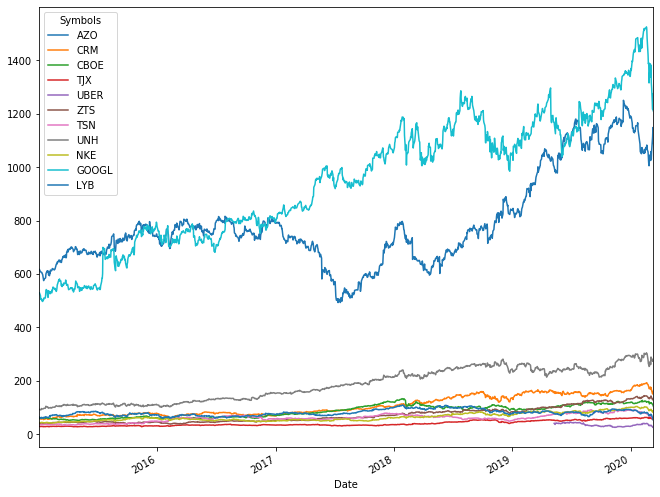

In [10]:
df1.plot(figsize=(11,9))
#df2.plot(figsize=(11,9))
#df3.plot(figsize=(11,9))
#df4.plot(figsize=(11,9))
print('')

In [11]:
stock_return1 = df1.apply(lambda x: x / x[0])
stock_return2 = df2.apply(lambda x: x / x[0])
stock_return3 = df3.apply(lambda x: x / x[0])
stock_return4 = df4.apply(lambda x: x / x[0])

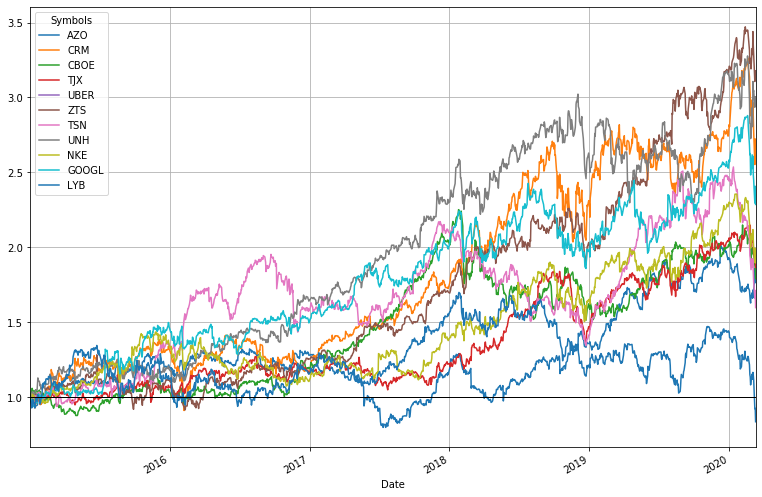

In [12]:
stock_return1.plot(grid = True,
                  figsize=(13,9)).axhline(y = 1, color = "black", lw = 1)

#stock_return2.plot(grid = True,
#                  figsize=(13,9)).axhline(y = 1, color = "black", lw = 1)

#stock_return3.plot(grid = True,
#                  figsize=(13,9)).axhline(y = 1, color = "black", lw = 1)

#stock_return4.plot(grid = True,
#                  figsize=(13,9)).axhline(y = 1, color = "black", lw = 1)

print('')

# SIMPLE RATE

In [13]:
stock_change1 = df1.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change2 = df2.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change3 = df3.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change4 = df4.apply(lambda x: np.log(x) - np.log(x.shift(1)))

In [14]:
#stock_change1.plot(grid=True).axhline(y = 0, color = "black", lw = 2)
#stock_change2.plot(grid=True).axhline(y = 0, color = "black", lw = 2)
#stock_change3.plot(grid=True).axhline(y = 0, color = "black", lw = 2)
#stock_change4.plot(grid=True).axhline(y = 0, color = "black", lw = 2)
#print('')

# Annual Percentage Rate of Return (APR)

In [15]:
stock_change_apr1 = stock_change1 * 252 * 100    
#stock_change_apr1.tail()

# df(1)

In [48]:
stocks_start1 = '2015-01-02'
stocks_end1 = '2020-03-10'
end_of_last_year1 = '2019-12-31'

position1 = 5000

In [60]:
list1

['AZO',
 'CRM',
 'CBOE',
 'TJX',
 'UBER',
 'ZTS',
 'TSN',
 'UNH',
 'NKE',
 'GOOGL',
 'LYB']

In [53]:
def get(list1, startdate, enddate):
    def data(list1):
        return (pdr.get_data_yahoo(list1, start=stocks_start1, end=stocks_end1))
    datas = map(data, list1)
    return(pd.concat(datas, keys=list1, names=['Ticker', 'Date']))
               
all_data1 = get(list1, stocks_start1, stocks_end1)
all_data1

High         Low        Open       Close     Volume  \
Ticker Date                                                                    
AZO    2015-01-02  623.979980  613.489990  623.979980  616.789978   224600.0   
       2015-01-05  616.109985  605.700012  614.460022  608.489990   439800.0   
       2015-01-06  612.340027  599.809998  610.770020  607.820007   388500.0   
       2015-01-07  616.000000  605.590027  616.000000  607.239990   388200.0   
       2015-01-08  614.969971  605.070007  610.359985  606.000000   593300.0   
...                       ...         ...         ...         ...        ...   
LYB    2020-03-04   75.309998   71.040001   73.449997   75.230003  2242400.0   
       2020-03-05   74.209999   72.610001   72.790001   73.910004  2746200.0   
       2020-03-06   74.160004   70.839996   71.410004   71.989998  3578600.0   
       2020-03-09   68.000000   59.599998   65.000000   59.610001  4379100.0   
       2020-03-10   63.060001   57.830002   62.770000   59.740002  3663200.0   

                    Adj Close  
Ticker Date                    
AZO    2015-01-02  616.789978  
       2015-01-05  608.489990  
       2015-01-06  607.820007  
       2015-01-07  607.239990  
       2015-01-08  606.000000  
...                       ...  
LYB    2020-03-04   75.230003  
       2020-03-05   73.910004  
       2020-03-06   71.989998  
       2020-03-09   59.610001  
       2020-03-10   59.740002  

[13260 rows x 6 columns]

In [54]:
adj_open1 = all_data1[['Adj Close']].reset_index()
adj_open_1 = adj_open1[adj_open1['Date']==stocks_start1]
adj_open_1.set_index('Ticker', inplace=True)
adj_open_1

,Date,Adj Close
Ticker,,
AZO,2015-01-02,616.789978
CRM,2015-01-02,59.240002
CBOE,2015-01-02,59.332840
TJX,2015-01-02,29.784307
ZTS,2015-01-02,41.755775
TSN,2015-01-02,36.626846
UNH,2015-01-02,92.760078
NKE,2015-01-02,44.143959
GOOGL,2015-01-02,529.549988


In [56]:
adj_close_1 = all_data1[['Adj Close']].reset_index()
adj_close_start = adj_close_1[adj_close_1['Date']==end_of_last_year1]
adj_close_latest_1 = adj_close_1[adj_close_1['Date']==stocks_end1]
adj_close_latest_1.set_index('Ticker', inplace=True)

In [57]:
data1=pd.DataFrame(adj_close_latest_1)
data1

,Date,Adj Close
Ticker,,
AZO,2020-03-10,1148.300049
CRM,2020-03-10,161.339996
CBOE,2020-03-10,110.900002
TJX,2020-03-10,57.970001
UBER,2020-03-10,28.969999
ZTS,2020-03-10,132.720001
TSN,2020-03-10,62.759998
UNH,2020-03-10,278.792389
NKE,2020-03-10,88.300003


In [58]:
data1['Unit_Cost']=adj_open_1['Adj Close']
data1['Cost_Basis']=position1
data1['Quantity']=position1/data1['Unit_Cost']
data1['Total_Pos']=data1['Quantity']*data1['Adj Close']
data1['Return_$']=data1['Total_Pos']-data1['Cost_Basis']
data1['Return_%']=data1['Adj Close'] / data1['Unit_Cost'] - 1

In [59]:
data1

,Date,Adj Close,Unit_Cost,Cost_Basis,Quantity,Total_Pos,Return_$,Return_%
Ticker,,,,,,,,
AZO,2020-03-10,1148.300049,616.789978,5000,8.106487,9308.679532,4308.679532,0.861736
CRM,2020-03-10,161.339996,59.240002,5000,84.402428,13617.487489,8617.487489,1.723497
CBOE,2020-03-10,110.900002,59.332840,5000,84.270364,9345.583457,4345.583457,0.869117
TJX,2020-03-10,57.970001,29.784307,5000,167.873636,9731.634899,4731.634899,0.946327
UBER,2020-03-10,28.969999,NaN,5000,NaN,NaN,NaN,NaN
ZTS,2020-03-10,132.720001,41.755775,5000,119.743914,15892.412461,10892.412461,2.178482
TSN,2020-03-10,62.759998,36.626846,5000,136.511890,8567.485962,3567.485962,0.713497
UNH,2020-03-10,278.792389,92.760078,5000,53.902499,15027.606360,10027.606360,2.005521
NKE,2020-03-10,88.300003,44.143959,5000,113.265781,10001.368813,5001.368813,1.000274


In [59]:
data1.reset_index(inplace=True)

In [64]:
data1.sort_values(by=['Return_%'],ascending=False,inplace=True)

In [65]:
data1

,level_0,index,Ticker,Date,Adj Close,Unit_Cost,Cost_Basis,Quantity,Total_Pos,Return_$,Return_%
5,5,5,ZTS,2020-03-10,132.720001,41.755775,5000,119.743914,15892.412461,10892.412461,2.178482
7,7,7,UNH,2020-03-10,280.000000,93.161888,5000,53.670016,15027.604401,10027.604401,2.005521
1,1,1,CRM,2020-03-10,161.339996,59.240002,5000,84.402428,13617.487489,8617.487489,1.723497
9,9,9,GOOGL,2020-03-10,1275.170044,529.549988,5000,9.441979,12040.129103,7040.129103,1.408026
8,8,8,NKE,2020-03-10,88.300003,44.264935,5000,112.956227,9974.035201,4974.035201,0.994807
3,3,3,TJX,2020-03-10,57.970001,29.784307,5000,167.873636,9731.634899,4731.634899,0.946327
2,2,2,CBOE,2020-03-10,110.900002,59.332840,5000,84.270364,9345.583457,4345.583457,0.869117
0,0,0,AZO,2020-03-10,1148.300049,616.789978,5000,8.106487,9308.679532,4308.679532,0.861736
6,6,6,TSN,2020-03-10,62.759998,36.626846,5000,136.511890,8567.485962,3567.485962,0.713497
10,10,10,LYB,2020-03-10,59.740002,64.483894,5000,77.538741,4632.164534,-367.835466,-0.073567


In [66]:
import chart_studio.plotly as py
py.sign_in('ramraider013', 'kdRiPEjRNbc9G248YEcb')

trace1 = go.Bar(
    x = data1['Ticker'][0:11],
    y = data1['Return_%'][0:11],
    name = 'Ticker YTD')

data=trace1

layout = go.Layout(title = 'YTD Return'
    , barmode = 'group'
    , yaxis=dict(title='Returns', tickformat=".%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [67]:
import chart_studio.plotly as py
py.sign_in('ramraider013', 'kdRiPEjRNbc9G248YEcb')

trace1 = go.Bar(
    x = data1['Ticker'][0:11],
    y = data1['Total_Pos'][0:11],
    name = 'Ticker YTD')

trace2 = go.Scatter(
    x = data1['Ticker'][0:11],
    y = data1['Cost_Basis'][0:11],
    name = 'Initial Funding')

data=[trace1, trace2]

layout = go.Layout(title = 'YTD Return $$$'
    , barmode = 'group'
    , yaxis=dict(title='Returns', tickformat=".%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# df(2)

In [40]:
stocks_start_2 = '2015-01-02'
stocks_end_2 = '2020-03-10'
end_of_last_year_2 = '2019-12-31'

position_2=5000

In [41]:
def get(list2, startdate, enddate):
    def data(list2):
        return (pdr.get_data_yahoo(list2, start=startdate, end=enddate))
    datas2 = map(data, list2)
    return(pd.concat(datas2, keys=list2, names=['Ticker', 'Date']))
               
all_data2 = get(list2, stocks_start_2, stocks_end_2)

NameError: name 'list2' is not defined

In [42]:
adj_open2 = all_data2[['Adj Close']].reset_index()
adj_open_2 = adj_open2[adj_open2['Date']==stocks_start_2]
adj_open_2.set_index('Ticker', inplace=True)

NameError: name 'all_data2' is not defined

In [30]:
adj_close_2 = all_data2[['Adj Close']].reset_index()
adj_close_start_2 = adj_close_2[adj_close_2['Date']==end_of_last_year_2]
adj_close_latest_2 = adj_close_2[adj_close_2['Date']==end_of_last_year_2]
adj_close_latest_2.set_index('Ticker', inplace=True)
#adj_close_latest_2

In [31]:
data2=pd.DataFrame(adj_close_latest_2)
#data2

In [32]:
data2['Unit_Cost']=adj_open_2['Adj Close']
data2['Cost_Basis']=5000
data2['Quantity']=position_2/data2['Unit_Cost']
data2['Total_Pos']=data2['Quantity']*data2['Adj Close']
data2['Return_$']=data2['Total_Pos']-data2['Cost_Basis']
data2['Return_%']=data2['Adj Close'] / data2['Unit_Cost'] - 1
data2

,Date,Adj Close,Unit_Cost,Cost_Basis,Quantity,Total_Pos,Return_$,Return_%
Ticker,,,,,,,,
MRK,2019-12-31,90.949997,49.132111,5000,101.766440,9255.657435,4255.657435,0.851131
ALXN,2019-12-31,108.150002,186.600006,5000,26.795283,2897.909914,-2102.090086,-0.420418
CEO,2019-12-31,166.669998,106.318558,5000,47.028478,7838.236415,2838.236415,0.567647
WPM,2019-12-31,29.750000,19.317028,5000,258.838988,7700.459908,2700.459908,0.540092
CNP,2019-12-31,26.977966,18.783176,5000,266.195658,7181.417483,2181.417483,0.436283
ING,2019-12-31,12.050000,10.326796,5000,484.177300,5834.336557,834.336557,0.166867
ABMD,2019-12-31,170.589996,37.310001,5000,134.012324,22861.161895,17861.161895,3.572232
GLW,2019-12-31,28.856369,20.192823,5000,247.612724,7145.204123,2145.204123,0.429041
CRL,2019-12-31,152.759995,63.880001,5000,78.271758,11956.793359,6956.793359,1.391359


In [68]:
data2.reset_index(inplace=True)
#data2

In [69]:
data2.sort_values(by=['Return_%'],ascending=False,inplace=True)

In [70]:
import chart_studio.plotly as py
py.sign_in('ramraider013', 'kdRiPEjRNbc9G248YEcb')

trace1 = go.Bar(
    x = data2['Ticker'][0:11],
    y = data2['Return_%'][0:11],
    name = 'Ticker YTD')

data=trace1

layout = go.Layout(title = 'YTD Return'
    , barmode = 'group'
    , yaxis=dict(title='Returns', tickformat=".%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [71]:
import chart_studio.plotly as py
py.sign_in('ramraider013', 'kdRiPEjRNbc9G248YEcb')

trace1 = go.Bar(
    x = data2['Ticker'][0:11],
    y = data2['Total_Pos'][0:11],
    name = 'Ticker YTD')

trace2 = go.Scatter(
    x = data2['Ticker'][0:11],
    y = data2['Cost_Basis'][0:11],
    name = 'Initial Funding')

data=[trace1, trace2]

layout = go.Layout(title = 'YTD Return $$$'
    , barmode = 'group'
    , yaxis=dict(title='Returns', tickformat=".%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# df(3)

In [36]:
stocks_start_3 = '2015-01-02'
stocks_end_3 = '2020-03-10'
end_of_last_year_3 = '2019-12-31'

position_3 = 5000

In [37]:
def get(list3, startdate, enddate):
    def data(list3):
        return (pdr.get_data_yahoo(list3, start=startdate, end=enddate))
    datas3 = map(data, list3)
    return(pd.concat(datas3, keys=list3, names=['Ticker', 'Date']))
               
all_data3 = get(list3, stocks_start_3, stocks_end_3)
#all_data3

In [38]:
adj_open3 = all_data3[['Adj Close']].reset_index()
adj_open_3 = adj_open3[adj_open3['Date']==stocks_start_2]
adj_open_3.set_index('Ticker', inplace=True)
#dj_open_3

In [39]:
adj_close_3 = all_data3[['Adj Close']].reset_index()
adj_close_start_3 = adj_close_3[adj_close_3['Date']==end_of_last_year_3]
adj_close_latest_3 = adj_close_3[adj_close_3['Date']==end_of_last_year_3]
adj_close_latest_3.set_index('Ticker', inplace=True)
#adj_close_latest_3

In [40]:
data3=pd.DataFrame(adj_close_latest_3)
#data3

In [41]:
data3['Unit_Cost']=adj_open_3['Adj Close']
data3['Cost_Basis']=5000
data3['Quantity']=position_3/data3['Unit_Cost']
data3['Total_Pos']=data3['Quantity']*data3['Adj Close']
data3['Return_$']=data3['Total_Pos']-data3['Cost_Basis']
data3['Return_%']=data3['Adj Close'] / data3['Unit_Cost'] - 1
data3

,Date,Adj Close,Unit_Cost,Cost_Basis,Quantity,Total_Pos,Return_$,Return_%
Ticker,,,,,,,,
DG,2019-12-31,155.658783,66.775269,5000,74.878022,11655.421710,6655.421710,1.331084
GIL,2019-12-31,29.318188,25.937689,5000,192.769681,5651.657692,651.657692,0.130332
CLF,2019-12-31,8.340000,6.824279,5000,732.678152,6110.535896,1110.535896,0.222107
AEM,2019-12-31,61.369148,25.458712,5000,196.396427,12052.681448,7052.681448,1.410536
CMCSA,2019-12-31,44.758591,26.041954,5000,191.997881,8593.554583,3593.554583,0.718711
BMY,2019-12-31,63.740002,51.972889,5000,96.204004,6132.043357,1132.043357,0.226409
TMUS,2019-12-31,78.419998,26.792324,5000,186.620615,14634.788303,9634.788303,1.926958
MOS,2019-12-31,21.576389,41.147938,5000,121.512772,2621.806885,-2378.193115,-0.475639
EOG,2019-12-31,83.482384,88.221100,5000,56.675784,4731.429548,-268.570452,-0.053714


In [72]:
data3.reset_index(inplace=True)
#data3

In [76]:
data3.sort_values(by=['Return_%'],ascending=False,inplace=True)

In [77]:
import chart_studio.plotly as py
py.sign_in('ramraider013', 'kdRiPEjRNbc9G248YEcb')

trace1 = go.Bar(
    x = data3['Ticker'][0:11],
    y = data3['Return_%'][0:11],
    name = 'Ticker YTD')

data=trace1

layout = go.Layout(title = 'YTD Return'
    , barmode = 'group'
    , yaxis=dict(title='Returns', tickformat=".%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [78]:
import chart_studio.plotly as py
py.sign_in('ramraider013', 'kdRiPEjRNbc9G248YEcb')

trace1 = go.Bar(
    x = data3['Ticker'][0:11],
    y = data3['Total_Pos'][0:11],
    name = 'Ticker YTD')

trace2 = go.Scatter(
    x = data3['Ticker'][0:11],
    y = data3['Cost_Basis'][0:11],
    name = 'Initial Funding')

data=[trace1, trace2]

layout = go.Layout(title = 'YTD Return $$$'
    , barmode = 'group'
    , yaxis=dict(title='Returns', tickformat=".%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# df(4)

In [45]:
stocks_start_4 = '2015-01-02'
stocks_end_4 = '2020-03-10'
end_of_last_year_4 = '2019-12-31'

position_4 = 5000

In [46]:
def get(list4, startdate, enddate):
    def data(list4):
        return (pdr.get_data_yahoo(list4, start=startdate, end=enddate))
    datas4 = map(data, list4)
    return(pd.concat(datas4, keys=list4, names=['Ticker', 'Date']))
               
all_data4 = get(list4, stocks_start_4, stocks_end_4)
#all_data4

In [47]:
adj_open4= all_data4[['Adj Close']].reset_index()
adj_open_4 = adj_open4[adj_open4['Date']==stocks_start_4]
adj_open_4.set_index('Ticker', inplace=True)
#dj_open_2

In [48]:
adj_close_4 = all_data4[['Adj Close']].reset_index()
adj_close_start_4 = adj_close_4[adj_close_4['Date']==end_of_last_year_4]
adj_close_latest_4 = adj_close_4[adj_close_4['Date']==end_of_last_year_4]
adj_close_latest_4.set_index('Ticker', inplace=True)
#adj_close_latest_4

In [49]:
data4=pd.DataFrame(adj_close_latest_4)
#data2

In [50]:
data4['Unit_Cost']=adj_open_4['Adj Close']
data4['Cost_Basis']=5000
data4['Quantity']=position_4/data4['Unit_Cost']
data4['Total_Pos']=data4['Quantity']*data4['Adj Close']
data4['Return_$']=data4['Total_Pos']-data4['Cost_Basis']
data4['Return_%']=data4['Adj Close'] / data4['Unit_Cost'] - 1
data4

,Date,Adj Close,Unit_Cost,Cost_Basis,Quantity,Total_Pos,Return_$,Return_%
Ticker,,,,,,,,
CNC,2019-12-31,62.869999,26.110001,5000,191.497506,12039.448001,7039.448001,1.407890
NOC,2019-12-31,342.720062,134.648788,5000,37.133643,12726.444337,7726.444337,1.545289
CF,2019-12-31,47.395805,44.698868,5000,111.859657,5301.678509,301.678509,0.060336
PPL,2019-12-31,35.407448,26.210531,5000,190.763016,6754.431548,1754.431548,0.350886
PLD,2019-12-31,89.139999,37.055561,5000,134.932514,12027.884186,7027.884186,1.405577
BCS,2019-12-31,9.166780,12.571612,5000,397.721458,3645.824918,-1354.175082,-0.270835
FMC,2019-12-31,99.820000,45.809246,5000,109.148271,10895.180370,5895.180370,1.179036
TOT,2019-12-31,54.567768,39.043278,5000,128.063019,6988.113096,1988.113096,0.397623
TECK,2019-12-31,17.370001,12.932438,5000,386.624706,6715.671468,1715.671468,0.343134


In [79]:
data4.reset_index(inplace=True)
#data4

In [80]:
data4.sort_values(by=['Return_%'],ascending=False,inplace=True)

In [81]:
import chart_studio.plotly as py
py.sign_in('ramraider013', 'kdRiPEjRNbc9G248YEcb')

trace1 = go.Bar(
    x = data4['Ticker'][0:11],
    y = data4['Return_%'][0:11],
    name = 'Ticker YTD')

data=trace1

layout = go.Layout(title = 'YTD Return'
    , barmode = 'group'
    , yaxis=dict(title='Returns', tickformat=".%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [82]:
import chart_studio.plotly as py
py.sign_in('ramraider013', 'kdRiPEjRNbc9G248YEcb')

trace1 = go.Bar(
    x = data4['Ticker'][0:11],
    y = data4['Total_Pos'][0:11],
    name = 'Ticker YTD')

trace2 = go.Scatter(
    x = data4['Ticker'][0:11],
    y = data4['Cost_Basis'][0:11],
    name = 'Initial Funding')

data=[trace1, trace2]

layout = go.Layout(title = 'YTD Return $$$'
    , barmode = 'group'
    , yaxis=dict(title='Returns', tickformat=".%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)